<a href="https://colab.research.google.com/github/L-Machado/GANs/blob/main/GAN's_verde.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Epoch 0, Loss D Real: 0.7027589678764343, Loss D Fake: 0.7249457836151123, Loss G: [array(0.7249458, dtype=float32), array(0.7249458, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Epoch 10, Loss D Real: 0.7441815137863159, Loss D Fake: 0.7495383620262146, Loss G: [array(0.74953836, dtype=float32), array(0.74953836, dtype=float32)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━

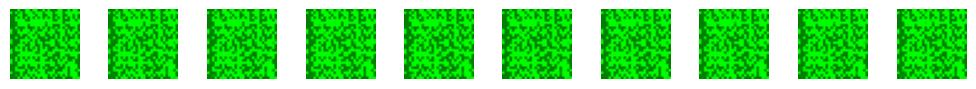

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, Sequential
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

def build_generator():
    model = Sequential([
        layers.Dense(7*7*64, activation='relu', input_dim=100),
        layers.Reshape((7, 7, 64)),
        layers.Conv2DTranspose(32, (5, 5), strides=(2, 2), padding='same', activation='relu'),
        layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', activation='sigmoid')  # 3 canais para RGB
    ])
    return model

def build_discriminator():
    model = Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=(28, 28, 3)),
        layers.LeakyReLU(alpha=0.2),
        layers.Flatten(),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

# Carregar e preparar os dados MNIST
(x_train, _), (_, _) = mnist.load_data()
x_train = np.expand_dims(x_train, axis=-1).astype('float32') / 255.0
x_train = np.concatenate([np.zeros_like(x_train), np.zeros_like(x_train), x_train], axis=-1)  # Convertendo para RGB verde

generator = build_generator()
discriminator = build_discriminator()
discriminator.compile(optimizer='adam', loss='binary_crossentropy')

# Conectando o gerador ao discriminador
discriminator.trainable = False
gan = Sequential([generator, discriminator])
gan.compile(optimizer='adam', loss='binary_crossentropy')

epochs = 1000
batch_size = 64
half_batch = batch_size // 2

for epoch in range(epochs):
    # Selecionar uma amostra aleatória de imagens reais
    idx = np.random.randint(0, x_train.shape[0], half_batch)
    real_images = x_train[idx]
    labels_real = np.ones((half_batch, 1))

    # Gerar uma amostra de imagens falsas
    noise = np.random.normal(0, 1, (half_batch, 100))
    fake_images = generator.predict(noise)
    labels_fake = np.zeros((half_batch, 1))

    # Treinando o discriminador
    d_loss_real = discriminator.train_on_batch(real_images, labels_real)
    d_loss_fake = discriminator.train_on_batch(fake_images, labels_fake)

    # Treinando o gerador
    noise = np.random.normal(0, 1, (batch_size, 100))
    gan_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    if epoch % 10 == 0:  # Reduzido para mostrar mais frequentemente
        print(f"Epoch {epoch}, Loss D Real: {d_loss_real}, Loss D Fake: {d_loss_fake}, Loss G: {gan_loss}")

# Gerar e visualizar algumas imagens
def plot_generated_images(generator, examples=10, dim=(1, 10), figsize=(10, 1)):
    noise = np.random.normal(0, 1, (examples, 100))
    generated_images = generator.predict(noise)
    generated_images = (generated_images + 1) / 2.0  # Reescalar para [0, 1]

    # Ajustar a visualização para tons de verde
    generated_images_green = np.zeros((examples, 28, 28, 3))
    generated_images_green[:, :, :, 1] = generated_images[:, :, :, 0]  # Canal verde

    fig, ax = plt.subplots(dim[0], dim[1], figsize=figsize)
    if dim[0] == 1 or dim[1] == 1:  # Se o layout for unidimensional
        ax = np.array([ax])  # Ajusta para que a indexação funcione
    cnt = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            if cnt < examples:
                ax[i, j].imshow(generated_images_green[cnt])
                ax[i, j].axis('off')
                cnt += 1
    plt.tight_layout()
    plt.show()

plot_generated_images(generator)
